# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Number of anomalies detected: 4


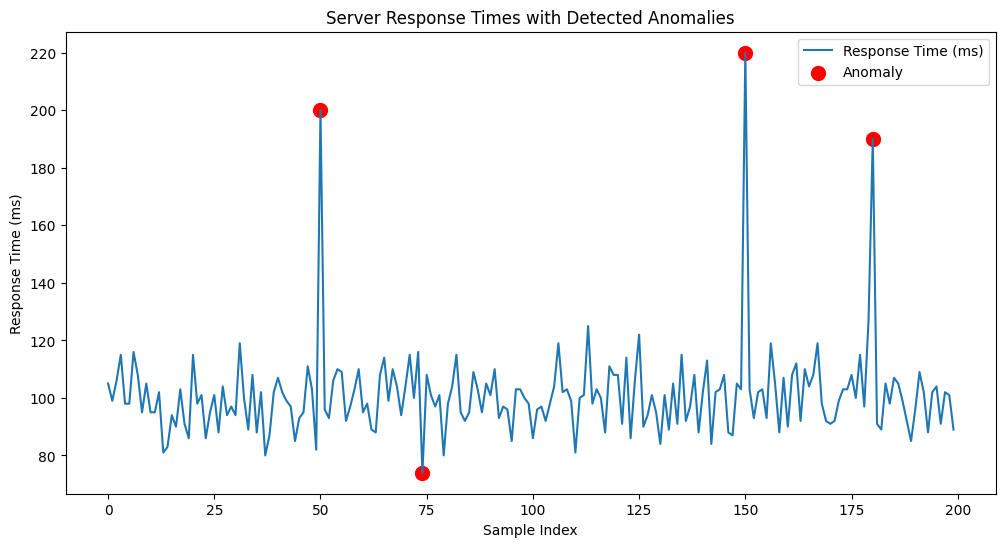

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Mock server response times (ms) dataset (replace with actual data)
np.random.seed(42)
response_times = np.random.normal(loc=100, scale=10, size=200).round()

# Inject anomalies (very high response times)
response_times[50] = 200
response_times[150] = 220
response_times[180] = 190

df = pd.DataFrame({"response_time_ms": response_times})

# 2. Train Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(df[["response_time_ms"]])

# 3. Detect anomalies
df["anomaly"] = model.predict(df[["response_time_ms"]])  # -1 = anomaly, 1 = normal
df["is_anomaly"] = df["anomaly"] == -1

# 4. Evaluate results
num_anomalies = df["is_anomaly"].sum()
print(f"Number of anomalies detected: {num_anomalies}")

# Optional: visualize anomalies
plt.figure(figsize=(12,6))
plt.plot(df.index, df["response_time_ms"], label="Response Time (ms)")
plt.scatter(df.index[df["is_anomaly"]], df.loc[df["is_anomaly"], "response_time_ms"],
            color="red", label="Anomaly", s=100)
plt.title("Server Response Times with Detected Anomalies")
plt.xlabel("Sample Index")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.show()

